In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [15]:
red_wine_df = pd.read_csv("winequality-red.csv", delimiter=";")
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
white_wine_df = pd.read_csv("winequality-white.csv", delimiter=";")
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Initial Questions
How much data do we have?

In [17]:
red_wine_df.shape

(1599, 12)

In [18]:
white_wine_df.shape

(4898, 12)

Overall we have a reasonable amount of data but we should note the imbalance between red and white wine. Let's go ahead and split the data into train test split.


In [19]:
red_wine_train, red_wine_test = train_test_split(red_wine_df, test_size=0.2)
white_wine_train, white_wine_test = train_test_split(white_wine_df, test_size=0.2)

How is quality of red and white wines distributed?

<AxesSubplot:>

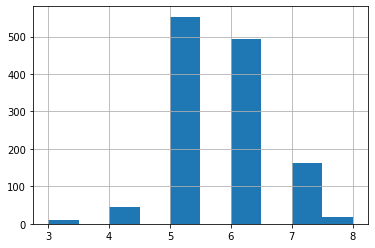

In [20]:
red_wine_train["quality"].hist()

In [21]:
red_wine_train["quality"].value_counts()

5    553
6    494
7    162
4     44
8     17
3      9
Name: quality, dtype: int64

<AxesSubplot:>

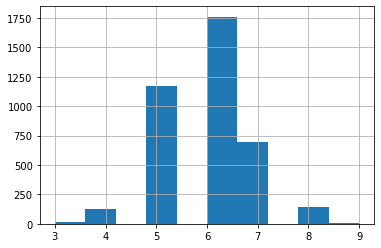

In [22]:
white_wine_train["quality"].hist()

In [23]:
white_wine_train["quality"].value_counts()

6    1761
5    1169
7     698
8     141
4     129
3      16
9       4
Name: quality, dtype: int64

Quality seems to be similarly distributed for red and white wines.

How correlated are the features with quality for red and white wines?


In [24]:
red_wine_train.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.243109,0.661261,0.109340,0.093148,-0.159765,-0.112393,0.666077,-0.688447,0.170959,-0.065860,0.122102
volatile acidity,-0.243109,1.000000,-0.550070,0.009816,0.044184,-0.002831,0.092042,0.040755,0.231159,-0.262972,-0.206646,-0.401664
citric acid,0.661261,-0.550070,1.000000,0.136752,0.214738,-0.071607,0.020160,0.359155,-0.537871,0.319720,0.107581,0.226593
residual sugar,0.109340,0.009816,0.136752,1.000000,0.055035,0.165469,0.188960,0.346646,-0.082069,0.011084,0.056120,-0.000411
chlorides,0.093148,0.044184,0.214738,0.055035,1.000000,0.004580,0.046834,0.210385,-0.264562,0.362037,-0.213451,-0.125299
free sulfur dioxide,-0.159765,-0.002831,-0.071607,0.165469,0.004580,1.000000,0.674727,-0.017027,0.080380,0.050672,-0.072242,-0.050299
total sulfur dioxide,-0.112393,0.092042,0.020160,0.188960,0.046834,0.674727,1.000000,0.100411,-0.045759,0.061742,-0.220874,-0.204025
density,0.666077,0.040755,0.359155,0.346646,0.210385,-0.017027,0.100411,1.000000,-0.348263,0.149682,-0.502594,-0.193673
pH,-0.688447,0.231159,-0.537871,-0.082069,-0.264562,0.080380,-0.045759,-0.348263,1.000000,-0.184678,0.205475,-0.065660
sulphates,0.170959,-0.262972,0.319720,0.011084,0.362037,0.050672,0.061742,0.149682,-0.184678,1.000000,0.100253,0.245464


In [25]:
white_wine_train.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.020073,0.289966,0.096086,0.027147,-0.044219,0.090732,0.271791,-0.438837,-0.024846,-0.128328,-0.128605
volatile acidity,-0.020073,1.000000,-0.153792,0.071185,0.080782,-0.097879,0.089672,0.036125,-0.023952,-0.025442,0.067705,-0.190150
citric acid,0.289966,-0.153792,1.000000,0.096637,0.112314,0.102137,0.118735,0.150303,-0.171971,0.060170,-0.076393,-0.009530
residual sugar,0.096086,0.071185,0.096637,1.000000,0.096571,0.303577,0.406266,0.839927,-0.182664,-0.024882,-0.449513,-0.097818
chlorides,0.027147,0.080782,0.112314,0.096571,1.000000,0.103566,0.210154,0.263835,-0.094321,0.022465,-0.361279,-0.215114
free sulfur dioxide,-0.044219,-0.097879,0.102137,0.303577,0.103566,1.000000,0.608636,0.293047,-0.001956,0.052684,-0.245880,0.017163
total sulfur dioxide,0.090732,0.089672,0.118735,0.406266,0.210154,0.608636,1.000000,0.528723,0.004088,0.137105,-0.443424,-0.175462
density,0.271791,0.036125,0.150303,0.839927,0.263835,0.293047,0.528723,1.000000,-0.089633,0.073659,-0.776339,-0.311622
pH,-0.438837,-0.023952,-0.171971,-0.182664,-0.094321,-0.001956,0.004088,-0.089633,1.000000,0.148257,0.121180,0.105168
sulphates,-0.024846,-0.025442,0.060170,-0.024882,0.022465,0.052684,0.137105,0.073659,0.148257,1.000000,-0.017678,0.057184


Let's note features with a $|r| \geq 0.20$.

Highly correlated features for red wine:
- alcohol (0.48)
- sulphates (0.24)
- total sulfur dioxide (-0.20)
- citric acid (0.22)
- volatile acidity (-0.40)

Highly correlated features for white wine:
- alcohol (0.44)
- density (-0.31)
- chlorides (-0.21)

## Prepare Data for Baseline Model
Let's now combine the two wine datasets, ensure they have no null or non-numeric entries, and save the data. We'll also
split the test set into a test and validation set for our pipeline.


In [26]:
# We'll encode red wine as 1 and white wine as 0
red_wine_train["wine"] = 1
red_wine_test["wine"] = 1
white_wine_train["wine"] = 0
white_wine_test["wine"] = 0

train_df = pd.concat([red_wine_train, white_wine_train], ignore_index=True)
train_df = train_df.sample(frac=1).reset_index(drop=True)

test_df = pd.concat([red_wine_test, white_wine_test], ignore_index=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)

test_df, val_df = train_test_split(test_df, test_size=0.5)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5197 non-null   float64
 1   volatile acidity      5197 non-null   float64
 2   citric acid           5197 non-null   float64
 3   residual sugar        5197 non-null   float64
 4   chlorides             5197 non-null   float64
 5   free sulfur dioxide   5197 non-null   float64
 6   total sulfur dioxide  5197 non-null   float64
 7   density               5197 non-null   float64
 8   pH                    5197 non-null   float64
 9   sulphates             5197 non-null   float64
 10  alcohol               5197 non-null   float64
 11  quality               5197 non-null   int64  
 12  wine                  5197 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 527.9 KB


In [27]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650 entries, 796 to 304
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         650 non-null    float64
 1   volatile acidity      650 non-null    float64
 2   citric acid           650 non-null    float64
 3   residual sugar        650 non-null    float64
 4   chlorides             650 non-null    float64
 5   free sulfur dioxide   650 non-null    float64
 6   total sulfur dioxide  650 non-null    float64
 7   density               650 non-null    float64
 8   pH                    650 non-null    float64
 9   sulphates             650 non-null    float64
 10  alcohol               650 non-null    float64
 11  quality               650 non-null    int64  
 12  wine                  650 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 71.1 KB


In [28]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650 entries, 214 to 306
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         650 non-null    float64
 1   volatile acidity      650 non-null    float64
 2   citric acid           650 non-null    float64
 3   residual sugar        650 non-null    float64
 4   chlorides             650 non-null    float64
 5   free sulfur dioxide   650 non-null    float64
 6   total sulfur dioxide  650 non-null    float64
 7   density               650 non-null    float64
 8   pH                    650 non-null    float64
 9   sulphates             650 non-null    float64
 10  alcohol               650 non-null    float64
 11  quality               650 non-null    int64  
 12  wine                  650 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 71.1 KB


In [29]:
train_df.to_csv("train_df.csv", index=False)
test_df.to_csv("test_df.csv", index=False)
val_df.to_csv("val_df.csv", index=False)